In [22]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os

from sklearn.metrics import roc_curve, auc


In [23]:
def load_stability(dataset, model_type, noise_type = "class_independent", epsilon=0.1, fixed_class = 0, fixed_noise = 0.0):
    path = "/scratch/hdd001/home/snagaraj/results/stability/"
    
    if noise_type == "class_independent":
        file_path = os.path.join(path, dataset, model_type, noise_type ,f"{epsilon}.pkl")
    elif noise_type == "class_conditional":
        file_path = os.path.join(path, dataset, model_type, noise_type ,f"{epsilon}.pkl")
    
    with open(file_path, 'rb') as file:
            # Use pickle to write the dictionary to the file
            data = pkl.load(file)
            
    return data
    

In [3]:
dataset = "cshock_eicu"
model_type = "LR"
noise_type = "class_conditional"

data = load_stability(dataset, model_type, noise_type)

df = pd.DataFrame(data)
df

,noise,disagreement_test,test_preds,draw_id
0,0.1,"[67.57757757757759, 97.72612612612613, 0.0, 85...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...",1
1,0.1,"[3.9639639639639643, 92.36396396396397, 0.0, 3...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",2
2,0.1,"[43.493093093093094, 30.8084084084084, 0.0, 53...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",3
3,0.1,"[48.783183183183176, 84.40280280280282, 0.0, 9...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...",4
4,0.1,"[100.05165165165167, 99.05865865865864, 0.0, 1...","[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",5
5,0.1,"[89.84984984984985, 57.54714714714716, 0.0, 90...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",6
6,0.1,"[85.1855855855856, 95.34294294294295, 0.0, 96....","[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",7
7,0.1,"[15.006606606606606, 99.49109109109109, 0.0, 8...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",8
8,0.1,"[98.51091091091091, 79.28568568568569, 0.0, 46...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...",9
9,0.2,"[91.56516516516517, 93.22882882882884, 0.40000...","[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, ...",1


In [17]:
regrets = []
coverages = []
thresholds = []
noise_levels = []
disagreement_tests = {}
iterations = []
datasets = []
draw_ids = []

noise_type = "class_independent"
model_type = "LR"

for dataset in ["cshock_eicu", "cshock_mimic", "saps", "support", "lungcancer"]:

    X_train, X_test, y_train, y_test, group_train, group_test = load_dataset_splits(dataset, group = "age")

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    
    try:
        data =  load_stability(dataset, model_type, noise_type)
    except Exception as e:
        print(f"failed to load {dataset} {model_type} {noise_type}")
        continue
        
    
    df = pd.DataFrame(data)



    for noise_level in df.noise.unique():

        for draw_id in df.draw_id.unique():
            sub_df = df[(df["noise"]==noise_level)& (df["draw_id"]==draw_id)]

            dis = sub_df.disagreement_test.values[0]
            preds = (sub_df.test_preds.values[0]>0.5).astype(int)

            for threshold in np.linspace(0,100,101): ##

                abstain_test = abstain(dis, threshold)

                regret = 100*np.mean(abs(preds-y_test)*(1-abstain_test))
                coverage = 100*np.mean(1-abstain_test)

                regrets.append(regret)
                coverages.append(coverage)
                thresholds.append(threshold)
                noise_levels.append(noise_level)

                datasets.append(dataset)
                draw_ids.append(draw_id)



            # Create a DataFrame from the arrays
data = pd.DataFrame({'Regret': regrets, 'Coverage': coverages, 'Noise Level': noise_levels, "Threshold":thresholds,  "Dataset":datasets, "Draw":draw_ids})

    #path = os.path.join(files_path, f"{epsilon}.pkl")

        # Open a file for writing

failed to load saps LR class_independent
failed to load lungcancer LR class_independent


In [18]:
data[(data["Noise Level"] == noise_level)]

,Regret,Coverage,Noise Level,Threshold,Dataset,Draw
1818,0.000000,0.000000,0.4,0.0,cshock_eicu,1
1819,0.000000,0.000000,0.4,1.0,cshock_eicu,1
1820,0.000000,0.000000,0.4,2.0,cshock_eicu,1
1821,0.000000,0.000000,0.4,3.0,cshock_eicu,1
1822,0.000000,0.000000,0.4,4.0,cshock_eicu,1
...,...,...,...,...,...,...
8176,14.329897,44.432990,0.4,96.0,support,9
8177,16.649485,50.670103,0.4,97.0,support,9
8178,19.536082,57.319588,0.4,98.0,support,9
8179,24.432990,69.020619,0.4,99.0,support,9


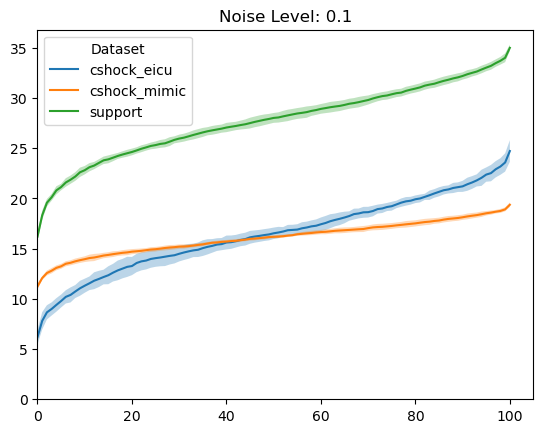

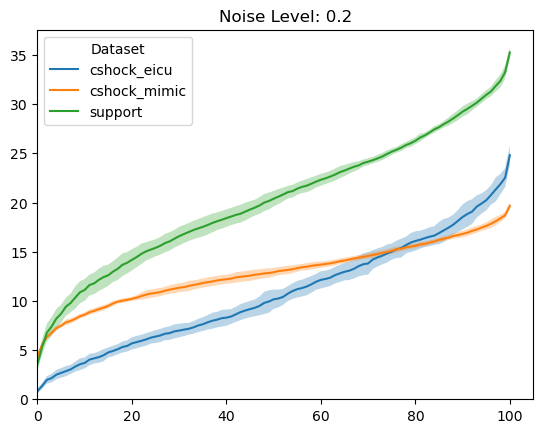

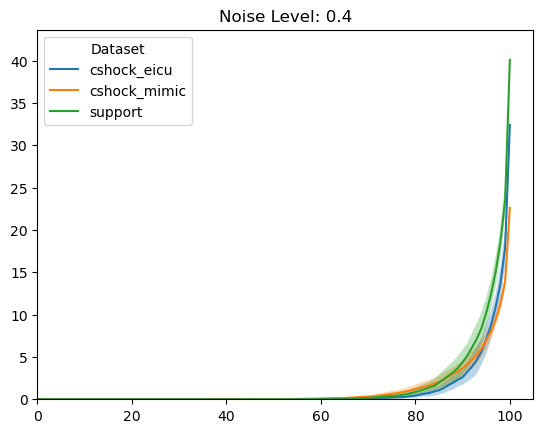

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming data is a pandas DataFrame
for noise_level in data["Noise Level"].unique():
    plt.figure()
    
    # Ensure data is properly indexed and converted if needed
    subset_data = data[data["Noise Level"] == noise_level]
    
    # Group by Threshold and Dataset and calculate mean and std of Regret
    grouped_data = subset_data.groupby(['Threshold', 'Dataset']).agg({'Regret': ['mean', 'std']}).reset_index()
    grouped_data.columns = ['Threshold', 'Dataset', 'Regret_mean', 'Regret_std']
    
    # Plot each dataset with a ribbon
    unique_datasets = grouped_data['Dataset'].unique()
    for dataset in unique_datasets:
        dataset_data = grouped_data[grouped_data['Dataset'] == dataset]
        thresholds = dataset_data['Threshold'].to_numpy()
        regrets_mean = dataset_data['Regret_mean'].to_numpy()
        regrets_std = dataset_data['Regret_std'].to_numpy()
        
        # Plot the mean line
        plt.plot(thresholds, regrets_mean, label=dataset)
        
        # Plot the ribbon (mean ± std)
        plt.fill_between(thresholds, regrets_mean - regrets_std, regrets_mean + regrets_std, alpha=0.3)
    
    # Set x-axis range from 0 to 100
    plt.xlim(0, 105)
    
    # Set y-axis minimum to 0
    plt.ylim(bottom=0)
    
    plt.title(f"Noise Level: {noise_level}")
    
    # Add legend for the datasets
    plt.legend(title='Dataset')
    
    # Show the plot
    plt.show()


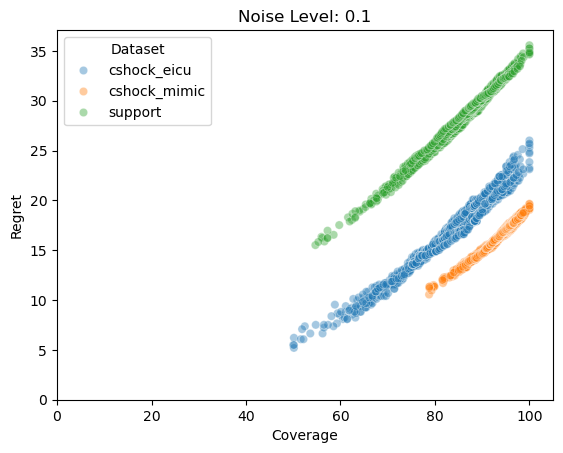

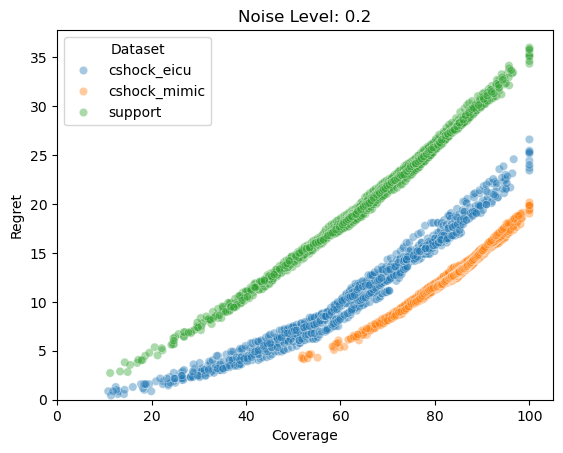

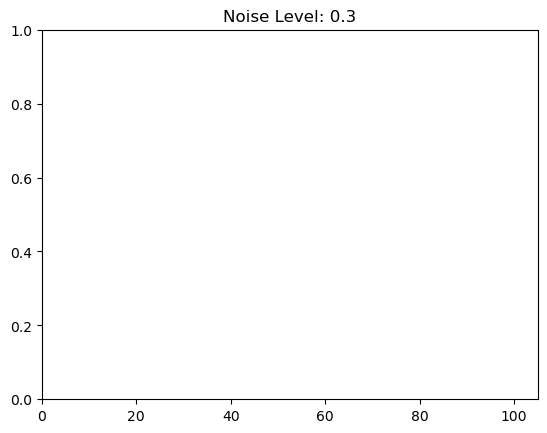

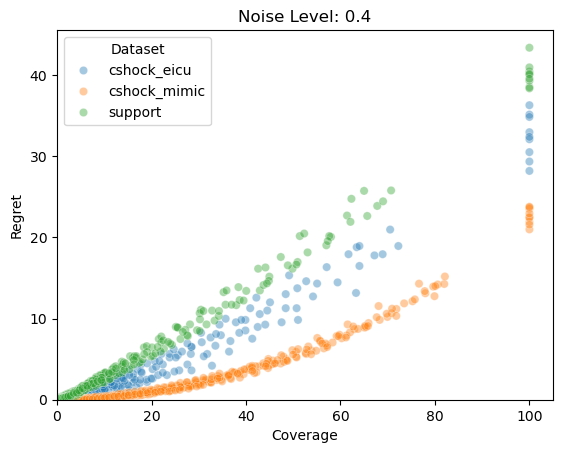

In [20]:
for noise_level in [0.1, 0.2, 0.3, 0.4]:
    plt.figure()
    # Create the scatter plot
    sns.scatterplot(x='Coverage', y='Regret', hue="Dataset", data=data[(data["Noise Level"] == noise_level)], alpha=0.4)
    
    # Set x-axis range from 0 to 100
    plt.xlim(0, 105)
    
    # Set y-axis minimum to 0
    plt.ylim(bottom=0)
    
    plt.title(f"Noise Level: {noise_level}")
    
    # Show the plot
    plt.show()


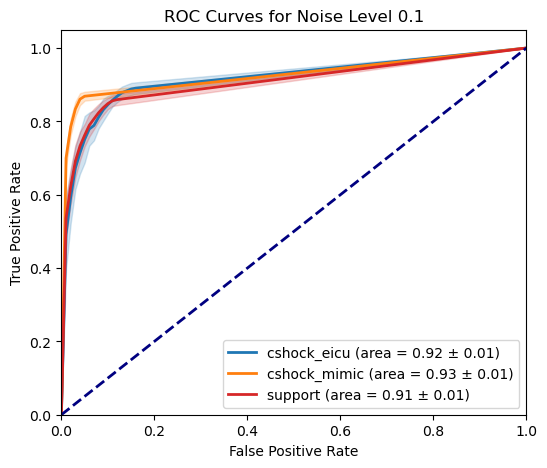

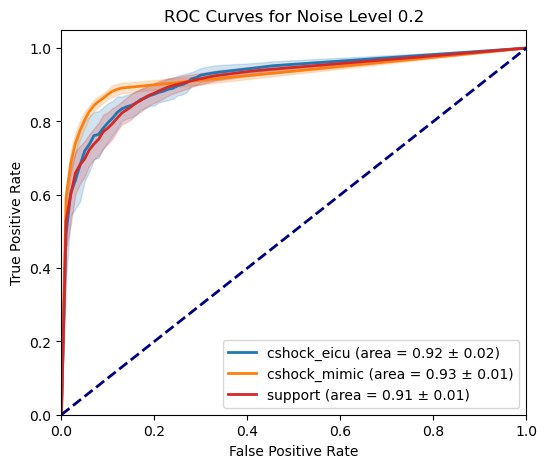

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false posi

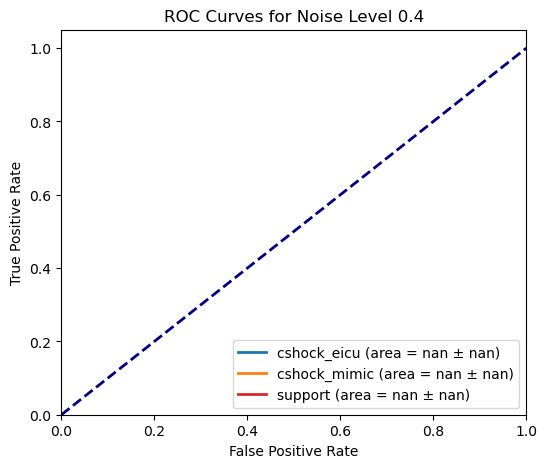

In [21]:
model_type = "LR"
noise_type = "class_independent"
fixed_threshold = 0  # Example threshold, adjust as needed

# Get unique noise levels and datasets
noise_levels = [0.1, 0.2,  0.4]
datasets = ["cshock_eicu", "cshock_mimic", "saps", "support", "lungcancer"]

# Loop through each noise level and plot ROC curves for all datasets
for noise_level in noise_levels:
    plt.figure(figsize=(6, 5))
    
    # Define colors for different datasets
    colors = sns.color_palette("tab10", len(datasets))
    
    for idx, dataset in enumerate(datasets):
        
        try:
            data = load_stability(dataset, model_type, noise_type)
        except: 
            continue

        df = pd.DataFrame(data)

        
        # Filter the dataframe for the specific noise level and dataset
        condition_df = df[(df['noise'] == noise_level)].copy()
        
        # Treat the first draw as the "ground truth"
        ground_truth_id = 1
        ground_truth_df = condition_df[condition_df['draw_id'] == ground_truth_id].copy()

        ground_truth_mask = (np.array(ground_truth_df['disagreement_test'].values[0]) > fixed_threshold).astype(int)

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 101)
        
        draw_ids = condition_df.draw_id.unique()
        draw_ids = np.delete(draw_ids, np.where(draw_ids == ground_truth_id))
        
        for draw_id in range(2,10):  # Skip the first draw_id as it's the ground truth
            current_draw_df = condition_df[condition_df['draw_id'] == draw_id].copy()
            current_draw_values = np.array(current_draw_df['disagreement_test'].values[0])
            
            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(ground_truth_mask, current_draw_values)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            
            # Interpolate tpr values
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
        
        # Compute mean and std of tprs
        tprs = np.array(tprs)
        mean_tpr = tprs.mean(axis=0)
        std_tpr = tprs.std(axis=0)
        mean_tpr[-1] = 1.0
        
        # Plot mean ROC curve for the current dataset using seaborn
        plt.plot(mean_fpr, mean_tpr, color=colors[idx], lw=2, label=f'{dataset} (area = {np.mean(aucs):.2f} ± {np.std(aucs):.2f})')
        
        # Plot standard deviation band
        tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
        tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color=colors[idx], alpha=0.2)
    
    # Plot reference line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Formatting the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for Noise Level {noise_level}')
    plt.legend(loc="lower right")
    plt.show()
